## Model capacity and under/overfitting

We will explore what capacity is, and what relationshipt there is between capacity and under/overfitting. 

### Qa) Explain the polynomial fitting via code review


Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

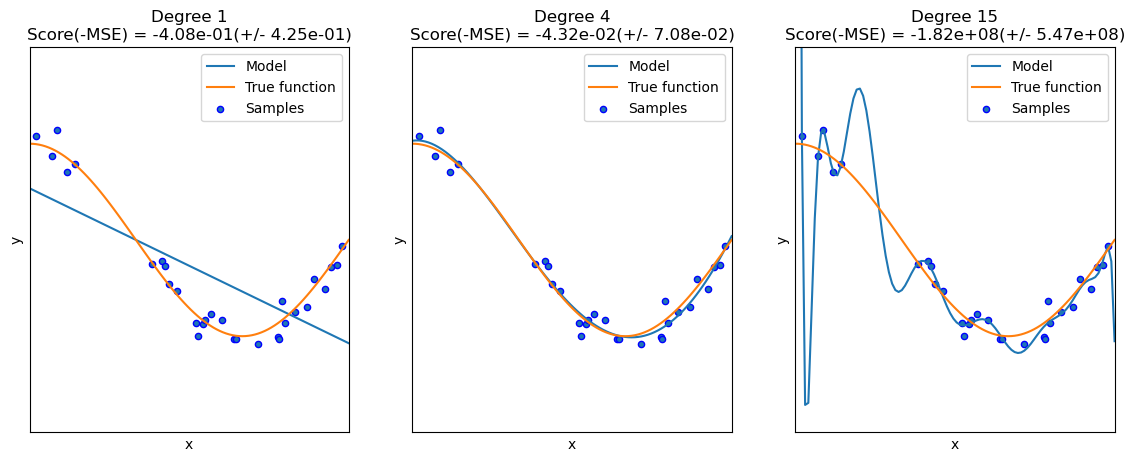

OK


In [ ]:
# TODO: code review 

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

###### Code review
The code above performs a polynomial fitting and demonstrates the effects of different polynomial degrees on the model's performance. 
<br>
First the true_fun represent the true function that fits the data.
The GenerateData function creates data points by using the true function and adding some noise to it. The number of samples/data points is 30.
The code then uses linear regression models with 3 different polynomial features, with degrees (1,4,15) to fit the models to the generated dataset. <br>
For each degree it: <br> 
Creates a pipeline with polynomial_features and linear_regression.  <br>
Fit the pipeline to the training data. <br>
Evaluates the model using cross-validation with 10 folds. <br>
Calculates the mean of the negative MSE.  <br>
Generates predictions for a Range of X values (X_test) using the trained mode. <br>
Lastly it plots the results.

The plot show the 3 different polynomial degrees, each trying to fit the model to the data. The left one, linear regression, clearly doesnt fit the data very well ie. underfitting, and is missing the patterns in the data. The right one is overfitting, which add patterns to the noise and makes the model perform bad at generalization. The middle one is almost a perfect fit as it is almost laying on top of the true function. This means that a degree of 4 is the best fit. 

### Qb) Explain the capacity and under/overfitting concept

What happens when the polynomial degree is low/medium/high with respect to under/overfitting  concepts? 

The Capacity refers to the models ability to represent complex relationships in the data. The more degrees of freedom or parameters a model has, the higher its capacity. 

When a model has low capacity, it means it is too simple to capture underlying patterns in data. It underfit the data, resulting in a model that cannot follow the true function. Underfit models have a high training error and high validation error. 

When a model has high capacity, it means it is too complex and can fit the training data too well, and unintentionally captures noise and outliers which means it is overfitting. High complexity leads to bas generalization. Overfit models have low training error but high validation error. 

With a low-degree polynomial, the model is too simple to capture the patterns as seen in the left plot. <br>
With a hight-degree, the model is too complex and overfits the training data, as seen in the right plot. <br>
With medium-degree the model has an appropiate level of complexity to capture underlying patterns without being sensitive to noise. This is seen in the middle plot. 

The choice of degree is crucial in determining wether the model underfits, goodfit or overfit the data. The plot illustrates this very good. Finding the right balance in model complexity is key to well-performing machine learning models. 

### Qc) Score method



The term "neg_mean_squared_error" is used in scikit-learn to follow a convention where scoring functions are treated as utility functions to be minimized, rather than cost functions to be maximized. The "neg" prefix signifies that the scoring function should be minimized. If it is set to mean_squared_error, an exception is raised with InvalidParameterError.

The degree 15 model have an extremly low MSE score, which indicates better fit. But it overfits the training data and fits every data point perfectly. This just means that MSE is not enough to tell if a model is good or not.

